# Transformers

In [1]:
import pandas as pd
import numpy as np
import logic.processing as lp
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/speroulakis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/speroulakis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/speroulakis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/speroulakis/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/speroulakis/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
df = lp.load_data('drugsComTrain_raw.csv')

In [3]:
def data_filter(df,uselfCount=0,min_length=30):

    df = df.dropna()
#     condition_distribution = df['condition'].value_counts()
#     best_conditions = condition_distribution.head(top_conditions)
#     top_conditions_list = best_conditions.index.tolist()
#     df = df[df['condition'].isin(top_conditions_list)]
    df = df[df['rating'].isin([1,2,3,8,9,10])]
    df['sentiment'] = 0
    df['sentiment'] = (df['rating'].isin([8,9,10])).astype(int)
    df = df[df['usefulCount']>uselfCount]
    df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))
    df = df[df.review_length>=min_length]

    return df


In [4]:
df1 = data_filter(df)

In [5]:
df2 = lp.preproc(df1)

In [6]:
df3 = df2.drop(columns=['drugName', 'condition', 'date', 'review_length' ])

In [7]:
data = df3.copy()

In [8]:
X = data['clean']
y = data['sentiment']

In [9]:
data

,uniqueID,review,rating,usefulCount,sentiment,clean
1,95260,"""My son is halfway through his fourth week of ...",8,192,1,my son be halfway through his fourth week of i...
3,138000,"""This is my first time using any form of birth...",8,10,1,this be my first time use any form of birth co...
4,35696,"""Suboxone has completely turned my life around...",9,37,1,suboxone have completely turn my life around i...
5,155963,"""2nd day on 5mg started to work with rock hard...",2,43,0,nd day on mg start to work with rock hard erec...
6,165907,"""He pulled out, but he cummed a bit in me. I t...",1,5,0,he pull out but he cummed a bite in me i take ...
...,...,...,...,...,...,...
161288,45410,"""I have been off Prozac for about 4 weeks now....",8,22,1,i have be off prozac for about week nowafter s...
161292,191035,"""I wrote my first report in Mid-October of 201...",10,125,1,i write my first report in midoctober of i hav...
161293,127085,"""I was given this in IV before surgey. I immed...",1,34,0,i be give this in iv before surgey i immediate...
161295,47128,"""I&#039;ve been on thyroid medication 49 years...",10,79,1,ive be on thyroid medication year i spend my f...


In [10]:
Xb, yb = lp.balance_dataset(X,y)

In [11]:
from transformers import AutoTokenizer
from transformers import TFAutoModel

/home/speroulakis/.pyenv/versions/3.10.6/envs/Mental_Health_Risks/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
tokenizer = AutoTokenizer.from_pretrained("prajjwal1/bert-tiny", padding_side = "right")

In [13]:
model = TFAutoModel.from_pretrained("prajjwal1/bert-tiny", from_pt = True)

2024-12-03 11:37:21.169494: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733222241.286505   44051 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733222241.322569   44051 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 11:37:21.614540: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-03 11:37:26.673566: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL

In [14]:
data["tokenized"] = data["review"].map(lambda x: tokenizer(x)["input_ids"])

data["len_tokenized"] = data["tokenized"].map(lambda x: len(x))

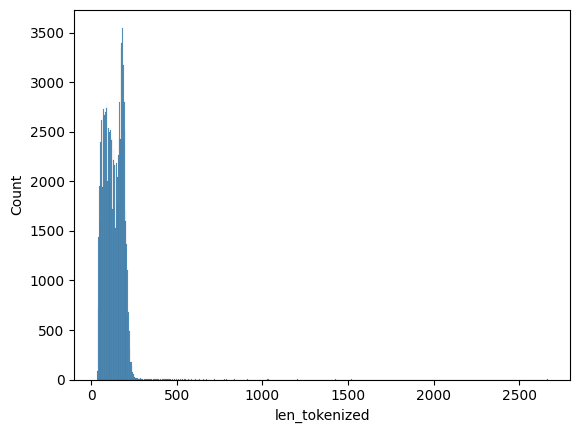

In [15]:
sns.histplot(data['len_tokenized']);

In [16]:
liszt = data['review'].tolist()

In [18]:
tokenized = tokenizer(liszt[:100], max_length=300, padding='max_length', truncation=True, return_tensors='tf')

In [25]:
tokenized.get('input_ids')

<tf.Tensor: shape=(100, 300), dtype=int32, numpy=
array([[ 101, 1000, 2026, ...,    0,    0,    0],
       [ 101, 1000, 2023, ...,    0,    0,    0],
       [ 101, 1000, 4942, ...,    0,    0,    0],
       ...,
       [ 101, 1000, 1045, ...,    0,    0,    0],
       [ 101, 1000, 2307, ...,    0,    0,    0],
       [ 101, 1000, 2026, ...,    0,    0,    0]], dtype=int32)>

In [82]:
embed = model.predict(tokenized.get('input_ids'))

4/4 [==============================] - 1s 188ms/step


In [86]:
embed.last_hidden_state.shape

(100, 300, 128)

In [74]:
test = []
for x in range(10):
  unit = tokenized.get('input_ids')
  emb = (model.predict(unit[x:x+1])).last_hidden_state[:, 0, :]
  test.append(emb)

1/1 [==============================] - 0s 29ms/step


In [81]:
test[0].shape

(1, 128)

In [77]:
seb = np.concatenate(test)

In [79]:
seb.shape

(10, 128)